In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# log N>S - log S plot

In [269]:
flares = pd.read_csv("../test/0227_flares_5s.csv", delimiter="\s+")
flares_s = flares[ (flares['snr_G'] > 8.) & (flares['mu'] > 0.0) ]
# flares.replace([np.inf, -np.inf], np.nan, inplace=True).dropna(subset=["col1", "col2"], how="all")
len(flares_s)

167

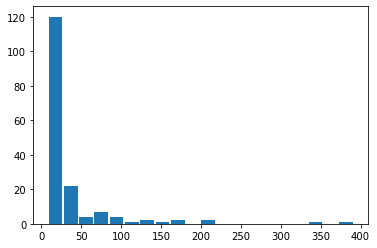

In [270]:
data = flares_s['snr_G'].values
plt.hist(data, bins=20,rwidth=0.9);

In [285]:
files = !ls ../test/flares/*_flares_5s.csv

In [222]:
tl = np.sum(c)
tl

167

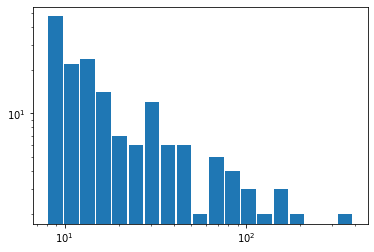

In [223]:
plt.hist(data, bins=bins,rwidth=0.9)
e = (edges[1:]+edges[:-1])/2.
plt.xticks(e[::2],[ "{0:3.1f}".format(x) for x in e[::2]]);
ys = 10**np.linspace(np.log10(np.min(n_gt_s)-0.1),np.log10(np.max(n_gt_s)+0.1),5)
plt.yticks(ys,[ "{0:2.0f}".format(x) for x in ys]);
plt.yscale('log')
plt.xscale('log')

In [585]:
files = !ls ../test/flares/????_flares_5s.csv
data = np.array([])
counter = 0
for f in files:
    flares = pd.read_csv(f, delimiter="\s+")
    flares_s = flares[ (flares['snr_G'] > 5.) & (flares['mu'] > 0.0)]
    counter += len(flares_s)
    print(f, ":", len(flares_s))
    data = np.concatenate( [data, flares_s['snr_G'].values] )
print("Total: ", counter)
# flares.replace([np.inf, -np.inf], np.nan, inplace=True).dropna(subset=["col1", "col2"], how="all")

../test/flares/0046_flares_5s.csv : 33
../test/flares/0050_flares_5s.csv : 11
../test/flares/0051_flares_5s.csv : 0
../test/flares/0052_flares_5s.csv : 0
../test/flares/0053_flares_5s.csv : 120
../test/flares/0054_flares_5s.csv : 2
../test/flares/0055_flares_5s.csv : 0
../test/flares/0056_flares_5s.csv : 654
../test/flares/0057_flares_5s.csv : 5
../test/flares/0058_flares_5s.csv : 33
../test/flares/0059_flares_5s.csv : 16
../test/flares/0060_flares_5s.csv : 3
../test/flares/0061_flares_5s.csv : 173
../test/flares/0062_flares_5s.csv : 10
../test/flares/0063_flares_5s.csv : 156
../test/flares/0064_flares_5s.csv : 361
../test/flares/0065_flares_5s.csv : 143
../test/flares/0066_flares_5s.csv : 35
../test/flares/0067_flares_5s.csv : 0
../test/flares/0103_flares_5s.csv : 150
../test/flares/0104_flares_5s.csv : 0
../test/flares/0105_flares_5s.csv : 366
../test/flares/0106_flares_5s.csv : 72
../test/flares/0107_flares_5s.csv : 59
../test/flares/0108_flares_5s.csv : 92
../test/flares/0109_flare

In [596]:
def lognlogs(data, plot=True, return_log=False, fit=False):
    n=len(data)
    nbins = min(n//4, 30)
    bins = 10**np.linspace(np.log10(np.min(data)-0.01),np.log10(np.max(data)+0.01),nbins)
    c, edges = np.histogram(data, bins=bins)
    cum = np.cumsum(c[::-1])
    n_gt_s = np.concatenate([ cum, np.array([0]) ])
    s = edges[1:]
    n_gt_s = cum[::-1]

    if fit:
        x1 = np.log10(s[:])
        y1 = np.log10(n_gt_s[:])
        z = np.polyfit(x1,y1,1)

    if plot:
        fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True, figsize=(8,8))
        fig.subplots_adjust(hspace=0.05)
        h = ax1.hist(data, bins=bins,rwidth=0.9)
        e = (edges[1:]+edges[:-1])/2.
        ys = 10**np.linspace(np.log10(np.min(n_gt_s)-0.1),np.log10(np.max(n_gt_s)+0.1),5)
        ax1.set_yticks(ys)
        ax1.set_yticklabels([ "{0:2.0f}".format(x) for x in ys])    
        ax1.set_yscale('log')
        ax1.set_xscale('log')
        if fit:
            ax2.plot(s, 10**z[1]*s**z[0], ":r", label="slope = {0:3.2f}".format(z[0]))
        ax2.loglog(s,n_gt_s, ".:")
        ys = 10**np.linspace(np.log10(np.min(n_gt_s)-0.1),np.log10(np.max(n_gt_s)+0.1),5)
        ax2.set_yticks(ys);    
        ax2.set_yticklabels([ "{0:2.0f}".format(x) for x in ys])
        ax1.set_title("log (N>S) - log(S)")
        ax1.set_xticks(e[::3])
        ax1.set_xticklabels([ "{0:3.0f}".format(x) for x in e[::3]])
        ax2.set_xlabel("Significance")
        ax2.set_ylabel("N > S")
        ax1.set_ylabel("N")
        if fit:
            plt.legend();
    if return_log:
        s = np.log10(s)
        n_gt_s = np.log10(n_gt_s)
    if fit:
        return s, n_gt_s, z
    else:
        return s, n_gt_s

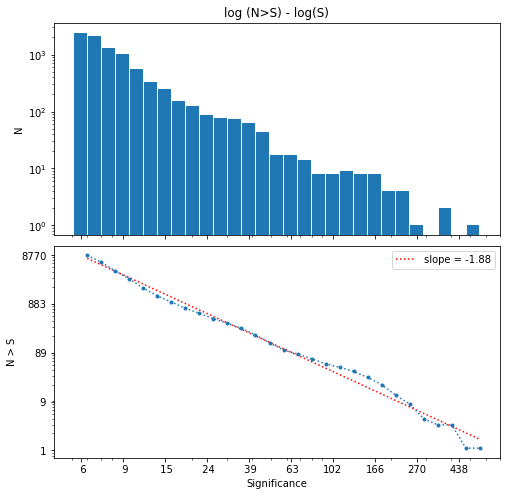

In [597]:
s, n_gt_s, z = lognlogs(data, fit=True)

In [ ]:

ys = 10**np.linspace(np.log10(np.min(n_gt_s)-0.1),np.log10(np.max(n_gt_s)+0.1),5)
plt.yticks(ys,[ "{0:2.0f}".format(x) for x in ys]);
plt.xticks(e[::2],[ "{0:2.0f}".format(x) for x in e[::2]]);
plt.plot(s,n_gt_s, "*-")
plt.yscale('log')
plt.xscale('log')

-1.6392382392642435


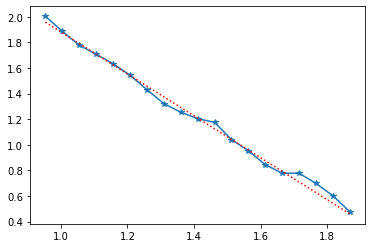

In [207]:
#plt.plot(np.log10(edges),np.log10(n_gt_s), "*-")
plt.plot(np.log10(s),np.log10(n_gt_s), "*-")

x1 = np.log10(s[:-3])
y1 = np.log10(n_gt_s[:-3])
z = np.polyfit(x1,y1,1)
print(z[0])
plt.plot(np.log10(s), z[0]*np.log10(s) + z[1], ":r")

In [158]:
from astropy.table import Table
import astropy.io.fits as fits

In [19]:
fn = "/Users/toast/Dropbox/inaf/repos/SGR1806/012200850010/obs/iipif/012200850010_evts_h.fits"
hdul = fits.open(fn)
hdul.info()

Filename: /Users/toast/Dropbox/inaf/repos/SGR1806/012200850010/obs/iipif/012200850010_evts_h.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   ()      
  1  GROUPING      1 BinTableHDU     45   2R x 6C   [8A, 32A, 1J, 1J, 256A, 3A]   
  2  GNRL-EVTS-LST    1 BinTableHDU     67   997892R x 9C   [1E, 1E, 1E, 1J, 1D, 1D, 1D, 1D, 1D]   
  3  GNRL-EVTS-GTI    1 BinTableHDU     53   2R x 6C   [1D, 1D, 4I, 4I, 32A, 32A]   


In [25]:
t = Table.read(fn, hdu=2)

In [26]:
t.remove_columns(['BARYTIME_1', 'TIMEDEL'])
t

DETY,DETZ,ENERGY,EVNT_TYPE,TIME,DEADC,PIF_1
mm,mm,keV,,d,,
float32,float32,float32,int32,float64,float64,float64
411.7,190.9,975.2079,0,1383.3136132690388,0.22380773723125458,0.7321588397026062
384.1,480.7,14.591111,0,1383.313613276103,0.21418313682079315,8.649810752103804e-07
370.3,29.9,123.97921,0,1383.313613282461,0.22586895525455475,8.649810752103804e-07
572.7,443.9,17.984001,0,1383.3136133064793,0.221378356218338,8.649810752103804e-07
29.9,94.3,45.18736,0,1383.3136133078922,0.2245924174785614,6.908079512868426e-07
374.9,485.3,219.90181,0,1383.3136133248463,0.21418313682079315,0.8047606348991394
112.7,549.7,37.917957,0,1383.3136133481585,0.2159787267446518,7.690378538427467e-07
6.9,264.5,53.6155,0,1383.3136133516907,0.22108295559883118,0.33931809663772583


In [28]:
hdul[2].data

FITS_rec([(411.7, 190.9, 975.2079  , 0, 1383.31361327, 7.0642542e-10, 0., 0.22380774, 7.32158840e-01),
          (384.1, 480.7,  14.591111, 0, 1383.31361328, 7.0642542e-10, 0., 0.21418314, 8.64981075e-07),
          (370.3,  29.9, 123.97921 , 0, 1383.31361328, 7.0642542e-10, 0., 0.22586896, 8.64981075e-07),
          ...,
          (471.5, 591.1,   5.557596, 0, 1383.33195624, 7.0642542e-10, 0., 0.22671729, 8.64981075e-07),
          (568.1, 563.5,   8.431238, 0, 1383.33195625, 7.0642542e-10, 0., 0.22671729, 3.44000578e-01),
          (568.1, 563.5,   5.909779, 0, 1383.33195625, 7.0642542e-10, 0., 0.22671729, 3.44000578e-01)],
         dtype=(numpy.record, [('DETY', '>f4'), ('DETZ', '>f4'), ('ENERGY', '>f4'), ('EVNT_TYPE', '>i4'), ('TIME', '>f8'), ('TIMEDEL', '>f8'), ('BARYTIME_1', '>f8'), ('DEADC', '>f8'), ('PIF_1', '>f8')]))